In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup
from warnings import filterwarnings
filterwarnings('ignore')

In [109]:
df = pd.read_csv("quoratrain.csv")

In [110]:
df.shape

(404290, 6)

In [111]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [113]:
# missing values
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [114]:
# duplicate rows
df.duplicated().sum()

0

In [115]:
df.is_duplicate.value_counts(normalize=True)
# Data is unbalanced

0    0.630802
1    0.369198
Name: is_duplicate, dtype: float64

<AxesSubplot:ylabel='is_duplicate'>

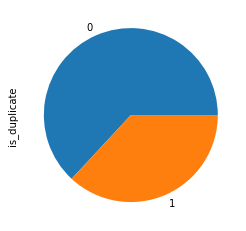

In [116]:
df.is_duplicate.value_counts(normalize=True).plot(kind='pie')

In [117]:
# Repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Number of unique questions: ",np.unique(qid).shape[0])

Number of unique questions:  537933


In [118]:
x = qid.value_counts()>1
print("Number of questions getting repeated:",x[x].shape[0])

Number of questions getting repeated: 111780


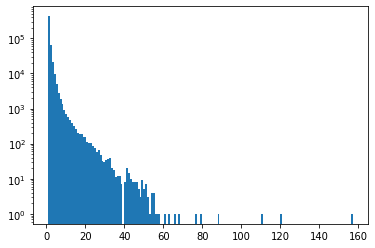

In [119]:
# Repeated questions Histogram
plt.hist(qid.value_counts().values,bins=160);
plt.yscale('log')
plt.show()

In [120]:
# We will take subset of the data

In [121]:
new_df = df.sample(30000)

In [122]:
new_df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [123]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 212786 to 381965
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [124]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
212786,212786,317939,317940,What causes a red bump to form on one's lip?,What is the history of red lip makeup?,0
136013,136013,217101,217102,What is the most wrong someone has been when g...,What do people really mean when they say someo...,0
2280,2280,4534,4535,"How do you distinguish fake, plastic rice impo...",How can Asian people eat rice three times a day?,0
388199,388199,117794,520569,"What photo book printing service is the best, ...",Where can I find a great photo book printing s...,1
116023,116023,189086,189087,Can a couple that has same blood type have a n...,What is a baby's normal blood oxygen level?,0


In [130]:
def preprocess(q):
    q = str(q).lower().strip()
    
    # Replacing certain characters with their string equivalant
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []
    
    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q    

In [135]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [136]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [137]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
212786,212786,317939,317940,What causes a red bump to form on one's lip?,What is the history of red lip makeup?,0,44,38,10,8
136013,136013,217101,217102,What is the most wrong someone has been when g...,What do people really mean when they say someo...,0,63,86,12,15
2280,2280,4534,4535,"How do you distinguish fake, plastic rice impo...",How can Asian people eat rice three times a day?,0,113,48,20,10
388199,388199,117794,520569,"What photo book printing service is the best, ...",Where can I find a great photo book printing s...,1,54,53,10,10
116023,116023,189086,189087,Can a couple that has same blood type have a n...,What is a baby's normal blood oxygen level?,0,57,43,12,8


In [138]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [139]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
212786,212786,317939,317940,What causes a red bump to form on one's lip?,What is the history of red lip makeup?,0,44,38,10,8,2
136013,136013,217101,217102,What is the most wrong someone has been when g...,What do people really mean when they say someo...,0,63,86,12,15,4
2280,2280,4534,4535,"How do you distinguish fake, plastic rice impo...",How can Asian people eat rice three times a day?,0,113,48,20,10,2
388199,388199,117794,520569,"What photo book printing service is the best, ...",Where can I find a great photo book printing s...,1,54,53,10,10,3
116023,116023,189086,189087,Can a couple that has same blood type have a n...,What is a baby's normal blood oxygen level?,0,57,43,12,8,3


In [140]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [141]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
212786,212786,317939,317940,What causes a red bump to form on one's lip?,What is the history of red lip makeup?,0,44,38,10,8,2,18
136013,136013,217101,217102,What is the most wrong someone has been when g...,What do people really mean when they say someo...,0,63,86,12,15,4,27
2280,2280,4534,4535,"How do you distinguish fake, plastic rice impo...",How can Asian people eat rice three times a day?,0,113,48,20,10,2,27
388199,388199,117794,520569,"What photo book printing service is the best, ...",Where can I find a great photo book printing s...,1,54,53,10,10,3,20
116023,116023,189086,189087,Can a couple that has same blood type have a n...,What is a baby's normal blood oxygen level?,0,57,43,12,8,3,19


In [142]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
212786,212786,317939,317940,What causes a red bump to form on one's lip?,What is the history of red lip makeup?,0,44,38,10,8,2,18,0.11
136013,136013,217101,217102,What is the most wrong someone has been when g...,What do people really mean when they say someo...,0,63,86,12,15,4,27,0.15
2280,2280,4534,4535,"How do you distinguish fake, plastic rice impo...",How can Asian people eat rice three times a day?,0,113,48,20,10,2,27,0.07
388199,388199,117794,520569,"What photo book printing service is the best, ...",Where can I find a great photo book printing s...,1,54,53,10,10,3,20,0.15
116023,116023,189086,189087,Can a couple that has same blood type have a n...,What is a baby's normal blood oxygen level?,0,57,43,12,8,3,19,0.16


In [143]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [144]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [145]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
212786,212786,317939,317940,What causes a red bump to form on one's lip?,What is the history of red lip makeup?,0,44,38,10,8,...,18,0.11,0.399992,0.285710,0.000000,0.000000,0.249997,0.199998,0,1
136013,136013,217101,217102,What is the most wrong someone has been when g...,What do people really mean when they say someo...,0,63,86,12,15,...,27,0.15,0.399992,0.199998,0.399992,0.285710,0.333331,0.266665,0,1
2280,2280,4534,4535,"How do you distinguish fake, plastic rice impo...",How can Asian people eat rice three times a day?,0,113,48,20,10,...,27,0.07,0.249997,0.222220,0.000000,0.000000,0.199998,0.100000,0,1
388199,388199,117794,520569,"What photo book printing service is the best, ...",Where can I find a great photo book printing s...,1,54,53,10,10,...,20,0.15,0.428565,0.374995,0.000000,0.000000,0.299997,0.299997,0,0
116023,116023,189086,189087,Can a couple that has same blood type have a n...,What is a baby's normal blood oxygen level?,0,57,43,12,8,...,19,0.16,0.333328,0.333328,0.499975,0.199996,0.374995,0.249998,0,0


In [149]:
import distance

def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [150]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [151]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
212786,212786,317939,317940,What causes a red bump to form on one's lip?,What is the history of red lip makeup?,0,44,38,10,8,...,0.285710,0.000000,0.000000,0.249997,0.199998,0,1,2,9.0,0.128205
136013,136013,217101,217102,What is the most wrong someone has been when g...,What do people really mean when they say someo...,0,63,86,12,15,...,0.199998,0.399992,0.285710,0.333331,0.266665,0,1,3,13.5,0.140625
2280,2280,4534,4535,"How do you distinguish fake, plastic rice impo...",How can Asian people eat rice three times a day?,0,113,48,20,10,...,0.222220,0.000000,0.000000,0.199998,0.100000,0,1,10,15.0,0.163265
388199,388199,117794,520569,"What photo book printing service is the best, ...",Where can I find a great photo book printing s...,1,54,53,10,10,...,0.374995,0.000000,0.000000,0.299997,0.299997,0,0,0,10.0,0.555556
116023,116023,189086,189087,Can a couple that has same blood type have a n...,What is a baby's normal blood oxygen level?,0,57,43,12,8,...,0.333328,0.499975,0.199996,0.374995,0.249998,0,0,4,10.0,0.204545


In [154]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [155]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [156]:
print(new_df.shape)
new_df.head()

(30000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
212786,212786,317939,317940,What causes a red bump to form on one's lip?,What is the history of red lip makeup?,0,44,38,10,8,...,0.199998,0,1,2,9.0,0.128205,38,42,52,50
136013,136013,217101,217102,What is the most wrong someone has been when g...,What do people really mean when they say someo...,0,63,86,12,15,...,0.266665,0,1,3,13.5,0.140625,38,40,53,56
2280,2280,4534,4535,"How do you distinguish fake, plastic rice impo...",How can Asian people eat rice three times a day?,0,113,48,20,10,...,0.100000,0,1,10,15.0,0.163265,26,44,37,41
388199,388199,117794,520569,"What photo book printing service is the best, ...",Where can I find a great photo book printing s...,1,54,53,10,10,...,0.299997,0,0,0,10.0,0.555556,61,60,65,75
116023,116023,189086,189087,Can a couple that has same blood type have a n...,What is a baby's normal blood oxygen level?,0,57,43,12,8,...,0.249998,0,0,4,10.0,0.204545,41,49,63,62


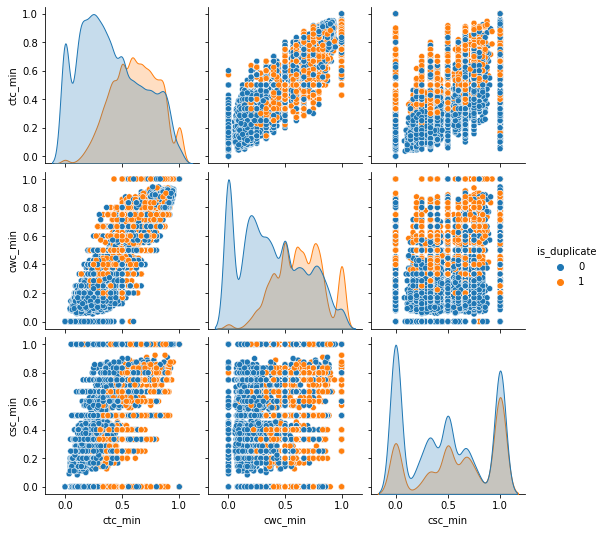

In [159]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

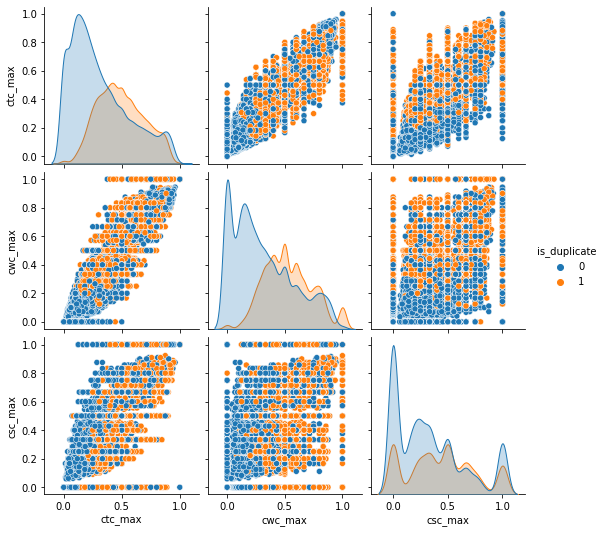

In [160]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

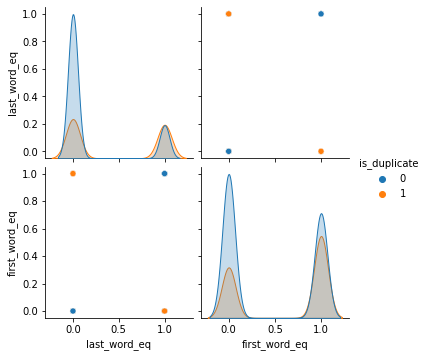

In [161]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

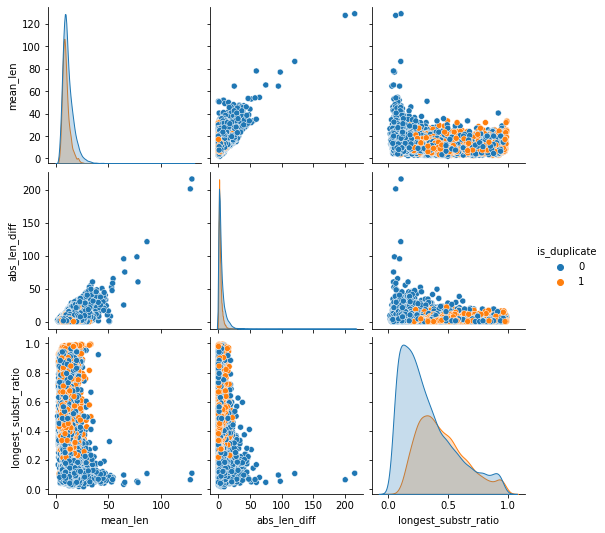

In [162]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

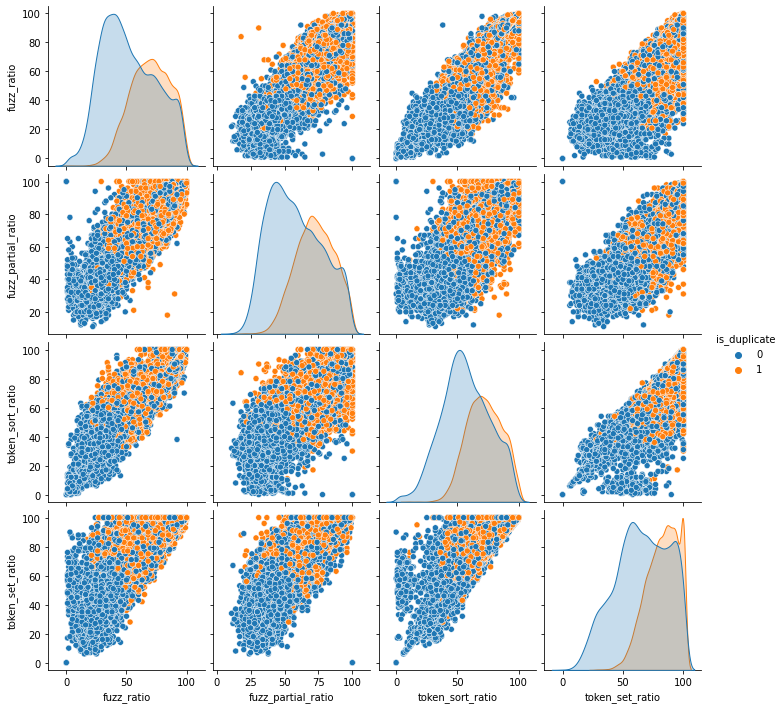

In [163]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [164]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [165]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.066s...
[t-SNE] Computed neighbors for 30000 samples in 6.110s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

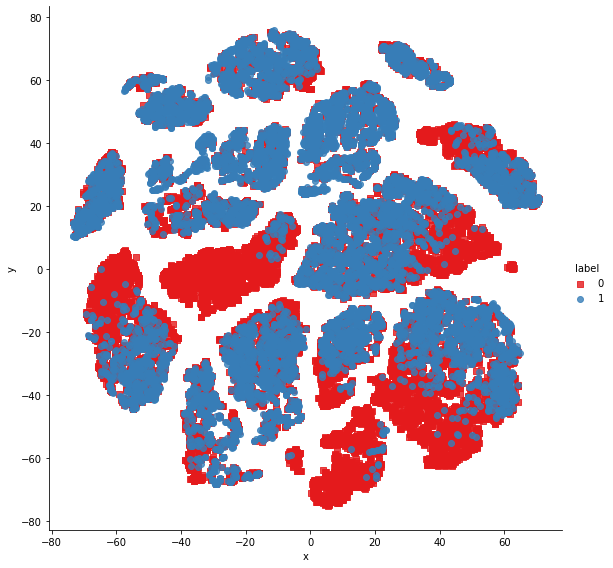

In [166]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])

In [169]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
212786,What causes a red bump to form on one's lip?,What is the history of red lip makeup?
136013,What is the most wrong someone has been when g...,What do people really mean when they say someo...
2280,"How do you distinguish fake, plastic rice impo...",How can Asian people eat rice three times a day?
388199,"What photo book printing service is the best, ...",Where can I find a great photo book printing s...
116023,Can a couple that has same blood type have a n...,What is a baby's normal blood oxygen level?


In [170]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
212786,0,44,38,10,8,2,18,0.11,0.399992,0.285710,...,0.199998,0,1,2,9.0,0.128205,38,42,52,50
136013,0,63,86,12,15,4,27,0.15,0.399992,0.199998,...,0.266665,0,1,3,13.5,0.140625,38,40,53,56
2280,0,113,48,20,10,2,27,0.07,0.249997,0.222220,...,0.100000,0,1,10,15.0,0.163265,26,44,37,41
388199,1,54,53,10,10,3,20,0.15,0.428565,0.374995,...,0.299997,0,0,0,10.0,0.555556,61,60,65,75
116023,0,57,43,12,8,3,19,0.16,0.333328,0.333328,...,0.249998,0,0,4,10.0,0.204545,41,49,63,62


In [171]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [172]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [173]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6023)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
212786,0,44,38,10,8,2,18,0.11,0.399992,0.285710,...,0,0,0,0,0,0,0,0,0,0
136013,0,63,86,12,15,4,27,0.15,0.399992,0.199998,...,0,0,0,0,0,0,0,0,0,0
2280,0,113,48,20,10,2,27,0.07,0.249997,0.222220,...,0,0,0,0,0,0,0,0,0,0
388199,1,54,53,10,10,3,20,0.15,0.428565,0.374995,...,0,0,0,0,0,0,0,0,0,0
116023,0,57,43,12,8,3,19,0.16,0.333328,0.333328,...,0,0,0,0,0,0,0,0,0,0


In [174]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7856666666666666

In [176]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7911666666666667

In [177]:
from sklearn.metrics import confusion_matrix

In [178]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[3203,  587],
       [ 699, 1511]], dtype=int64)

In [179]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3154,  636],
       [ 617, 1593]], dtype=int64)

In [180]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [181]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [182]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [183]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [184]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [185]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [186]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [188]:
rf.predict(query_point_creator(q1,q3))

array([1], dtype=int64)

In [189]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))